In [1]:
import pandas as pd
import numpy as np
import sys
%matplotlib inline

In [2]:
from describe import describe

In [3]:
if __name__ == "__main__":
    sys.argv[1] = "datasets/dataset_train.csv"
    if len(sys.argv) < 2:
        print("USAGE: histogram.py <csv files>")
    else:
        data = pd.read_csv(sys.argv[1])
        #print(data.columns)
        data_grp = data.groupby('Hogwarts House').groups
        houses = data['Hogwarts House'].unique().tolist()
        houses.sort()        
        if (houses != ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']):
            print("data is corrupted")
        
        
        subjects = compare_by = ['Arithmancy', 'Astronomy', 'Herbology',
            'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
            'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
            'Care of Magical Creatures', 'Charms', 'Flying']
        
        compare_between = houses
        
        new_index = pd.MultiIndex.from_product([compare_by, compare_between], names=["Subject", "Hogwarts House"])
        
        """
        df = data
        house_data = {}
        homogeneity_data = {}
        for house in houses:
            homogeneity_data[house] = df.loc[df['Hogwarts House'] == house]
            numeric_features = []
            for c in df.columns:
                col_type = df[c].dtype
                if col_type == float or col_type == int:
                    numeric_features.append(c)
            describe_df = describe(homogeneity_data[house], numeric_features)
            house_data[house] = describe_df
        
        #Total all house:
        numeric_features = []
        for c in df.columns:
            col_type = df[c].dtype
            if col_type == float or col_type == int:
                numeric_features.append(c)
        describe_df = describe(df, numeric_features)
        house_data['Total Student'] = describe_df
        
        observed_df = observed_table(house_data, numeric_features, houses, 'sum') """
        
        print(data)
            

      Index Hogwarts House First Name    Last Name    Birthday Best Hand  \
0         0      Ravenclaw     Tamara          Hsu  2000-03-30      Left   
1         1      Slytherin      Erich      Paredes  1999-10-14     Right   
2         2      Ravenclaw   Stephany        Braun  1999-11-03      Left   
3         3     Gryffindor      Vesta    Mcmichael  2000-08-19      Left   
4         4     Gryffindor     Gaston        Gibbs  1998-09-27      Left   
...     ...            ...        ...          ...         ...       ...   
1595   1595     Gryffindor       Jung        Blank  2001-09-14     Right   
1596   1596      Slytherin     Shelli         Lock  1998-03-12      Left   
1597   1597     Gryffindor   Benjamin  Christensen  1999-10-24     Right   
1598   1598     Hufflepuff  Charlotte       Dillon  2001-09-21      Left   
1599   1599     Hufflepuff      Kylie        Nowak  2000-08-21      Left   

      Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0        5838

In [4]:
data

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [5]:
print(data[['Index', 'Hogwarts House', 'Astronomy']])
print(compare_between)
df_by_house = data[['Index', 'Hogwarts House', 'Astronomy']].groupby("Hogwarts House")
#df_by_subject = data.groupby('Arithmancy')
print(compare_by)


      Index Hogwarts House   Astronomy
0         0      Ravenclaw -487.886086
1         1      Slytherin -552.060507
2         2      Ravenclaw -366.076117
3         3     Gryffindor  697.742809
4         4     Gryffindor  436.775204
...     ...            ...         ...
1595   1595     Gryffindor  354.280086
1596   1596      Slytherin  367.531174
1597   1597     Gryffindor  544.018925
1598   1598     Hufflepuff  453.676219
1599   1599     Hufflepuff  688.911989

[1600 rows x 3 columns]
['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying']


In [6]:
list(df_by_house)

[('Gryffindor',
        Index Hogwarts House   Astronomy
  3         3     Gryffindor  697.742809
  4         4     Gryffindor  436.775204
  6         6     Gryffindor  628.046051
  8         8     Gryffindor  496.394945
  16       16     Gryffindor  470.653757
  ...     ...            ...         ...
  1573   1573     Gryffindor  324.973343
  1578   1578     Gryffindor  419.360183
  1592   1592     Gryffindor  376.920722
  1595   1595     Gryffindor  354.280086
  1597   1597     Gryffindor  544.018925
  
  [327 rows x 3 columns]),
 ('Hufflepuff',
        Index Hogwarts House   Astronomy
  7         7     Hufflepuff  411.412727
  9         9     Hufflepuff  527.193585
  10       10     Hufflepuff  604.933962
  11       11     Hufflepuff  438.556950
  12       12     Hufflepuff  709.094614
  ...     ...            ...         ...
  1587   1587     Hufflepuff  511.749312
  1589   1589     Hufflepuff  708.202206
  1594   1594     Hufflepuff  599.901612
  1598   1598     Hufflepuff  453.67

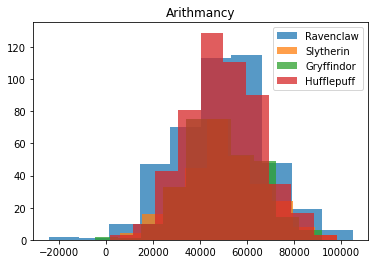

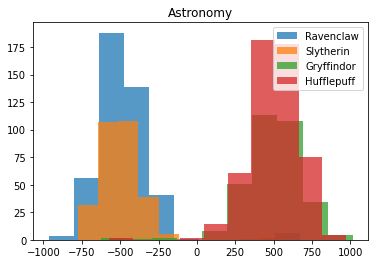

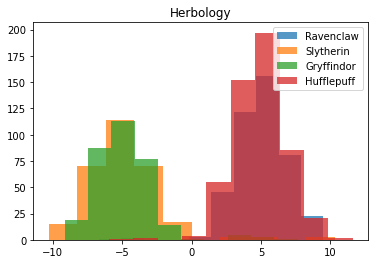

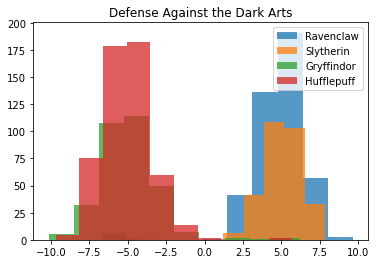

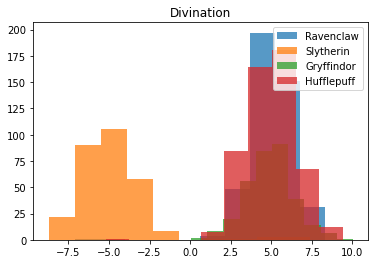

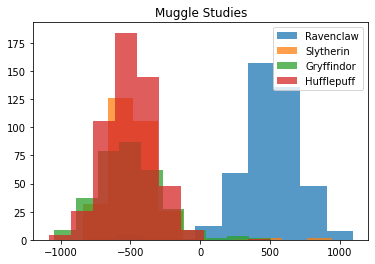

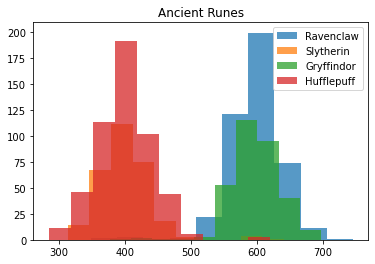

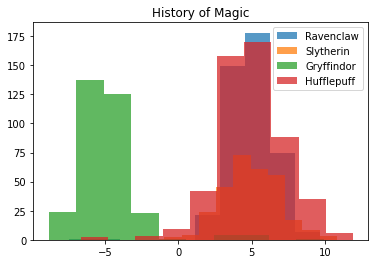

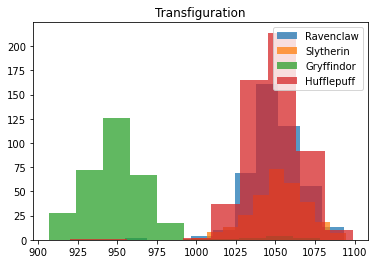

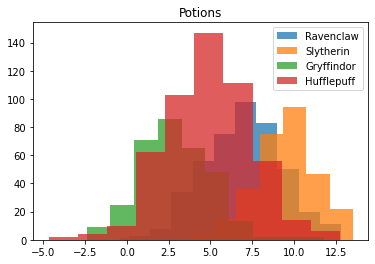

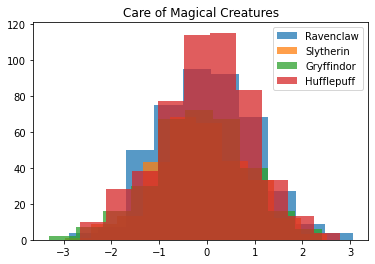

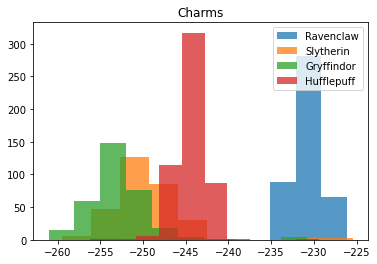

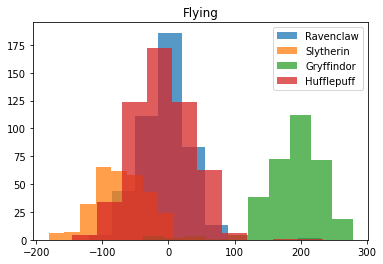

In [21]:
import matplotlib.pyplot as plt


for course in subjects:
    d = data[[course, "Hogwarts House"]]
    for h in data['Hogwarts House'].unique():
        plt.hist(d[d['Hogwarts House'] == h][course], alpha=0.75, label=h)
    plt.title(course)
    plt.legend(loc='upper right')
    plt.show()



In [ ]:
data.

In [ ]:
data

In [ ]:
Pivot = data.iloc[1:7]
print(Pivot)
Pivot = Pivot.melt(id_vars = ['Hogwarts House'], value_vars = subjects, var_name = 'Subject', value_name='Grades')
print (Pivot)


In [ ]:
pivoted = Pivot.pivot_table(Pivot, index = ['Hogwarts House'], columns=['Subject'], aggfunc='array')
print (pivoted)
#pivoted = data.pivot(data, index=new_index, columns=["Hogwarts House"])

In [ ]:
#new = {'Index': data['Index'],
#      'Hogwarts House': data['Hogwarts House'],
 #     'First Name': data['First Name'],
  #    'Last Name': data['Last Name'],
   #   'Birthday': data['Birthday'],
    #  'Best Hand': data['Best Hand'],
     # 'Subject': ''}#
#pd.DataFrame(new)
new_index = pd.MultiIndex.from_product([data['Hogwarts House'].unique(),subjects], names=["Index", "Subjects"])

print(subjects.extend)

#Notes = data.loc['Index', 'Arithmancy', 'Astronomy', 'Herbology',
#       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
#       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
#       'Care of Magical Creatures', 'Charms', 'Flying']

Notes = data[['Index', 'Hogwarts House','Arithmancy', 'Astronomy', 'Herbology',
      'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying']]



#print (Notes.T)
Notes2 = data.iloc[1:3]

#print (Notes2.groupby(['Hogwarts House', '']))

#Notes2.plot.hist(b)

Notes2 = data.melt(id_vars = ['Hogwarts House'], value_vars = subjects, var_name = 'Subject', value_name='Grades')

test2 = Notes2.groupby(['Subject','Hogwarts House'])

#print (test2.unstack())
#print (test2['Subject'=='Arithmancy'])

#for subject in subjects:
test2['Subject'=='Arithmancy'].plot.hist(by='Subject')

#print (test2.groups)

#test2[['Hogwarts House']].plot.hist()

#Notes = data.melt(id_vars = ['Hogwarts House'], value_vars = subjects, var_name = 'Subject', value_name='Grades')
#Notes2 = Notes2.melt(id_vars = ['Index','Hogwarts House'], value_vars = subjects, var_name = 'Subject', value_name='Grades')

#print (Notes2[['Hogwarts House', 'Grades']])

#Notes2[['Hogwarts House', 'Grades']].hist(by="Hogwarts House", column='Grades')
#tab = Notes2.iloc[:,['Hogwarts House', 'Grades']]


#print (tab)

#print (Notes2.groupby(['Hogwarts House', 'Notes']).groups)


#pivot = data.pivot(index="Index", columns="")
#pivoted = data.pivot(data, index=new_index, columns=["Hogwarts House"])
#pivoted


In [ ]:
#du = Notes2.groupby(by = ['Grades','Hogwarts House'])

#print(du.groups)

#tit = du['Subject'].T.unstack()


#tit.hist()
#du.hist(column='Grades')
#pivoted = Notes.pivot_table(index="Grades", columns="Hogwarts House", aggfunc=len, fill_value=0)
#pivoted['Subject']

#histogram(column)
#histogram = pivoted['Subject'].hist()
#Notes2.hist(index="")

In [ ]:
data['Hogwarts House'].unique()

In [ ]:
data_grp.groups

In [ ]:
def myvar(col):
    mean = mymean(col)
    c = mycount(col)
    if not c or c < 2:
        return numpy.nan

    for e in col:
        mysum += e - mean
    return mysum/(c - 1)

In [ ]:
subjects = ['Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying']
new_index = pd.MultiIndex.from_product([subject, houses], names=["Index", "Subject"])
print (new_index)

In [ ]:
data